In [3]:
from google.colab import files
uploaded =files.upload()
import pandas as pd
import numpy as np
file_name=list(uploaded.keys())[0]
df=pd.read_csv(file_name)
df.head(15)


Saving IRIS.csv to IRIS.csv


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [7]:
print("Duplicate rows:",df.duplicated().sum())
df=df.drop_duplicates()
print("After removing,duplicates:",df.duplicated().sum())

Duplicate rows: 3
After removing,duplicates: 0


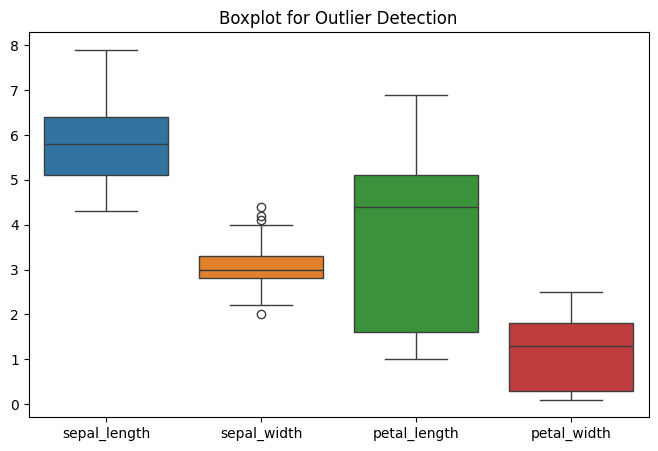

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
sns.boxplot(data=df)
plt.title("Boxplot for Outlier Detection")
plt.show()


In [10]:
print(df.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    147.000000   147.000000    147.000000   147.000000
mean       5.856463     3.055782      3.780272     1.208844
std        0.829100     0.437009      1.759111     0.757874
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.400000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


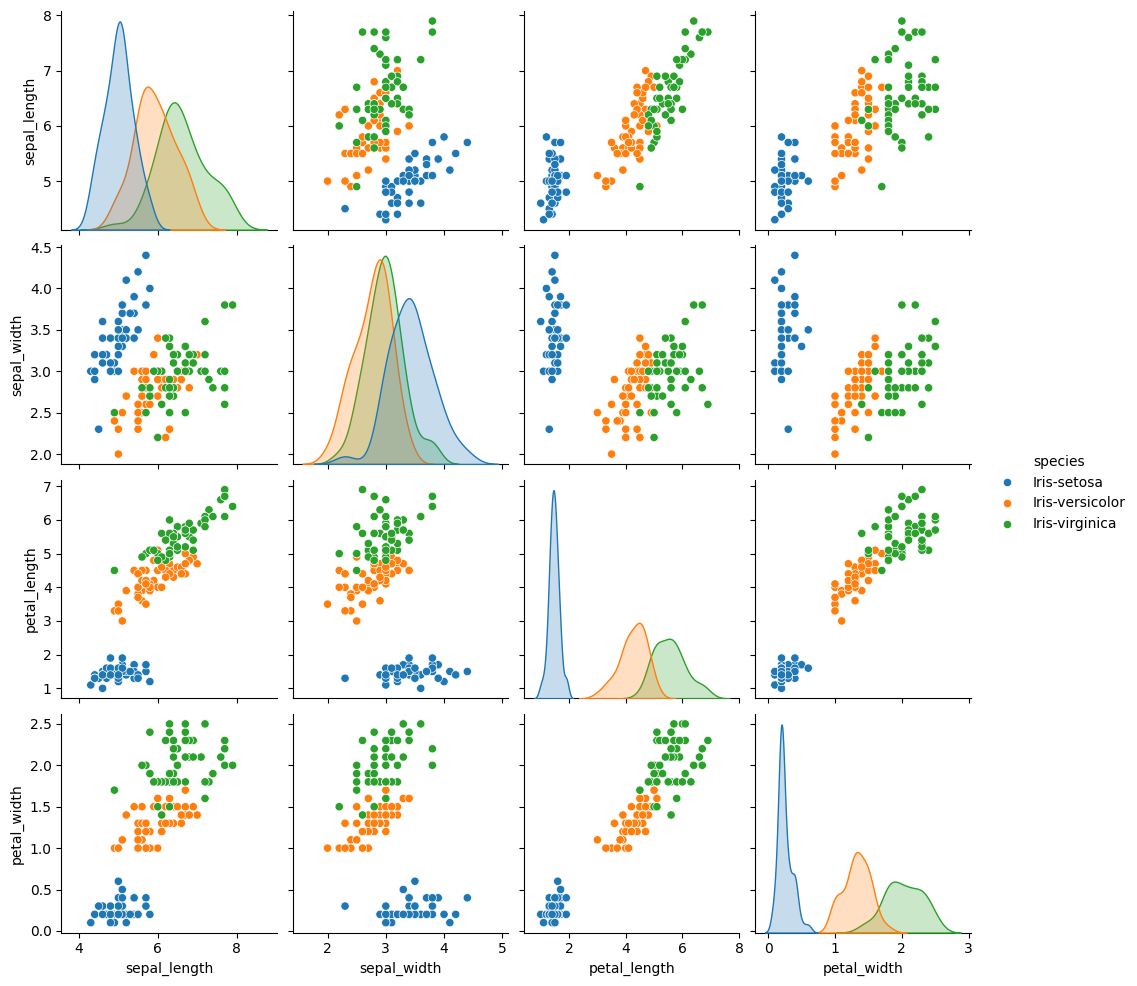

In [11]:
sns.pairplot(df,hue="species")
plt.show()

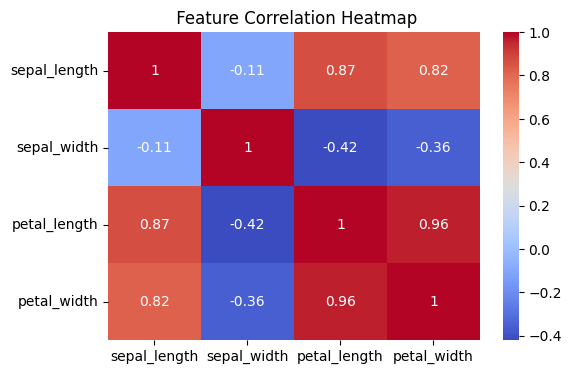

In [13]:
plt.figure(figsize=(6,4))
sns.heatmap(df.drop('species', axis=1).corr(),annot=True,cmap="coolwarm")
plt.title(" Feature Correlation Heatmap")
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
X=df.drop("species",axis=1)
y=df["species"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train,y_train)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
dt_pred=dt_model.predict(X_test)
print("Decision Tree Accuracy:",accuracy_score(y_test,dt_pred))
print(classification_report(y_test,dt_pred))
print(confusion_matrix(y_test,dt_pred))

Decision Tree Accuracy: 0.9333333333333333
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.89      0.89      0.89         9

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30

[[11  0  0]
 [ 0  9  1]
 [ 0  1  8]]


In [21]:
from sklearn.model_selection import GridSearchCV
param_grid={
    'max_depth':[2,3,4,5,None],
    'min_samples_split':[2,3,4,5],
    'criterion':['gini','entropy']
}
grid=GridSearchCV(DecisionTreeClassifier(random_state=42),param_grid,cv=5)
grid.fit(X_train,y_train)
print("Best Parameters:",grid.best_params_)
print("Best Score:",grid.best_score_)

Best Parameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 2}
Best Score: 0.9489130434782609


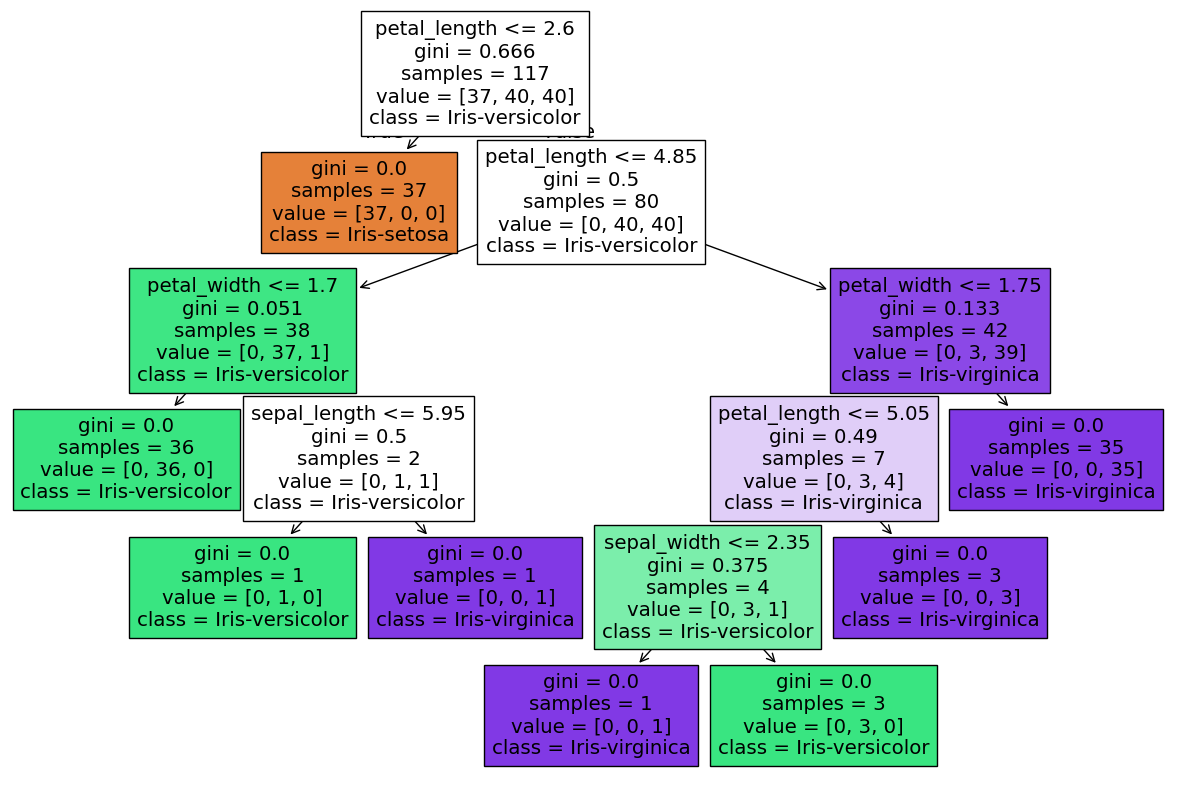

In [23]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,10))
plot_tree(dt_model,feature_names=X.columns,class_names=dt_model.classes_,filled=True)
plt.show()